# 1 - Code de la descente du gradient 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class GradientDescent():
    """Gradient descent avec/sans régularisation.
    
    Parameters
    ----------
    alpha : float > 0
        alpha est le taux d'apprentissage qui détermine la rapidité de la descente.
    nombre_iterations : int > 0
        nombre_iterations est le nombre maximum d'itérations.
        
    Notes
    -----
    Cette classe : 
        - calcule les paramètres optimaux (weights) d'un modèle linéaire en utilisant
          une méthode de gradient de descente avec ou sans régularisation;
        - réalise une prédiction = calcul la sortie 𝑦 à partir d’une entrée;
        - calcule le score (coefficient de détermination entre une liste de sorties réelles 
          et une liste de sorties prédites par le modèle);
        - retourne le MSE entre une liste de sorties réelles et une liste de sorties prédites par le modèle;
        - affiche le graphe de convergence de la fonction coût;
        - affiche le graphe de poids;
        - donne la possibilité de normaliser ou de standardiser les données avant entrainement
        - etc...
    """
    def __init__(self, alpha, nombre_iterations):
        
        # affectation du taux d'apprentissage et du nombre d'itérations
        self.alpha = alpha
        self.nombre_iterations = nombre_iterations   
        
    
    def GradDescClassic(self, X, Y):
        """Calcul par descente de gradient le vecteur de poids (Weights) qui minimisent
           la fonction coût classique (sans régularisation)
        Notes
        -----
        Weights : vecteur de poids, vecteur colonne de type 2D array
        X : matrice d'observations, type 2D array
        Y : sorties réelles, vecteur colonne de type 2D array
        """
        # stock les valeurs de la fonction d'erreur
        self.cacheLoss = [None]*self.nombre_iterations 
        
        # Génère aléatoirement un vecteur de poids, pour l'initialisation
        Weights = np.random.rand(X.shape[1])
    
        Weights = np.array(Weights)
        Weights = Weights.reshape(-1, 1)
        m = X.shape[0]
        
        # Calcul de la fonction d'erreur pour chaque itération
        for i in range(self.nombre_iterations):
            
            # prédiction à partir de la matrice d'observations X et du vecteur de poids Weights
            predictions = self.getPred(X, Weights) 
            
            # Stockage de la fonction d'erreur
            self.cacheLoss[i] = self.Loss(Y, predictions) 
        
            # Mise à jour du poids correspondant à l'intercept
            Weights[0] = Weights[0] - (1/m)*self.alpha*(np.matmul(X[:,0].transpose(), predictions-Y))
            
            # Mise à jour du poids de chaque feature
            for j in range(1, len(Weights)):
                
                Weights[j] = Weights[j] - (1/m)*self.alpha*(np.matmul(X[:,j].transpose(), predictions-Y))
                
        return (Weights)

    def GradDescRidge(self, X, Y, lmb):
        """Calcul par descente de gradient le vecteur de poids (Weights) qui minimisent
           la fonction coût avec régularisation L2 (Régression Ridge)
        Notes
        -----
        Weights : vecteur de poids, vecteur colonne de type 2D array
        X : matrice d'observations, type 2D array
        Y : sorties réelles, vecteur colonne de type 2D array
        lmb : pénalité
        """
        # stock les valeurs de la fonction d'erreur
        self.cacheLoss = [None]*self.nombre_iterations
        
        # Génère aléatoirement un vecteur de poids, pour l'initialisation
        Weights = np.random.rand(X.shape[1])
    
        Weights = np.array(Weights)
        Weights = Weights.reshape(-1, 1)
        m = X.shape[0]
        
        # Calcul de la fonction d'erreur pour chaque itération
        for i in range(self.nombre_iterations):
            
            # prédiction à partir de la matrice d'observations X et du vecteur de poids Weights
            predictions = self.getPred(X, Weights)
            
            # Stockage de la fonction d'erreur
            self.cacheLoss[i] = self.Loss(Y, predictions)
            
            # Mise à jour du poids correspondant à l'intercept
            Weights[0] = Weights[0] - (1/m)*self.alpha*(np.matmul(X[:,0].transpose(), predictions-Y))
            
            # Mise à jour du poids de chaque feature
            for j in range(1, len(Weights)):
                
                Weights[j] = Weights[j] - (1/m)*self.alpha*(np.matmul(X[:,j].transpose(), predictions-Y)
                                                            + sum(np.dot(Weights[j],lmb)))
        return (Weights)

    def GradDescLasso(self, X, Y, lmb):
        """Calcul par descente de gradient le vecteur de poids (Weights) qui minimisent
           la fonction coût avec régularisation L1 (Régression Lasso)
        Notes
        -----
        Weights : vecteur de poids, vecteur colonne de type 2D array
        X : matrice d'observations, type 2D array
        Y : sorties réelles, vecteur colonne de type 2D array
        lmb : pénalité
        """
        # stock les valeurs de la fonction d'erreur
        self.cacheLoss = [None]*self.nombre_iterations
        
        # Génère aléatoirement un vecteur de poids, pour l'initialisation
        Weights = np.random.rand(X.shape[1])
    
        Weights = np.array(Weights)
        Weights = Weights.reshape(-1, 1)
        m = X.shape[0]
        
        # Calcul de la fonction d'erreur pour chaque itération
        for i in range(self.nombre_iterations):
            
            # prédiction à partir de la matrice d'observations X et du vecteur de poids Weights
            predictions = self.getPred(X, Weights)
            
            # Stockage de la fonction d'erreur
            self.cacheLoss[i] = self.Loss(Y, predictions)
            
            # Mise à jour du poids correspondant à l'intercept
            Weights[0] = Weights[0] - (1/m)*self.alpha*(np.matmul(X[:,0].transpose(), predictions-Y))
            
            # Mise à jour du poids de chaque feature
            for j in range(1, len(Weights)):
                
                Weights[j] = Weights[j] - (1/m)*self.alpha*(np.matmul(X[:,j].transpose(), predictions-Y) 
                                                            + 0.5*(np.dot(np.copysign([1], Weights[j]), lmb)))
        return (Weights)

    def GradDescElastic(self, X, Y, lmb1, lmb2):
        """Calcul par descente de gradient le vecteur de poids (Weights) qui minimisent
           la fonction coût dans le cas de la Régression Elastic
        Notes
        -----
        Weights : vecteur de poids, vecteur colonne de type 2D array
        X : matrice d'observations, type 2D array
        Y : sorties réelles, vecteur colonne de type 2D array
        lmb1, lmb2 : les pénalités
        """  
        # stock les valeurs de la fonction d'erreur
        self.cacheLoss = [None]*self.nombre_iterations
        
        # Génère aléatoirement un vecteur de poids, pour l'initialisation
        Weights = np.random.rand(X.shape[1])
    
        Weights = np.array(Weights)
        Weights = Weights.reshape(-1, 1)
        m = X.shape[0]
        
        # Calcul de la fonction d'erreur pour chaque itération
        for i in range(self.nombre_iterations):
            
            # prédiction à partir de la matrice d'observations X et du vecteur de poids Weights
            predictions = self.getPred(X, Weights)
            
            # Stockage de la fonction d'erreur
            self.cacheLoss[i] = self.Loss(Y, predictions)
            
            # Mise à jour du poids correspondant à l'intercept
            Weights[0] = Weights[0] - (1/m)*self.alpha*(np.matmul(X[:,0].transpose(), predictions-Y))
            
            # Mise à jour du poids de chaque feature
            for j in range(1, len(Weights)):
                
                Weights[j] = Weights[j] - (1/m)*self.alpha*(np.matmul(X[:,j].transpose(), predictions-Y) 
                                                            + 0.5*(np.dot(np.copysign([1], Weights[j]), lmb1)) 
                                                           + (np.dot(Weights[j], lmb2)))
        return (Weights)
    
    def getRidgeLambda(self, X, Y):
        """Recherche de pénalité optimale dans le cas de la régression ridge.
           Cette fonction entraine un set de train sur une séquence de valeurs lmb(pénalité) et pour chaque
           lmb, elle calcule le MSE correspondant sur le set de validation. Elle retourne la valeur lmb qui a le
           plus faible MSE.
        Notes
        -----
        X : matrice d'observations, type 2D array 
        Y : sorties réelles, vecteur colonne de type 2D array
        """
        # Données d'entrainement et données de validation
        X_train, X_Validate, Y_train, Y_Validate = sklearn.model_selection.train_test_split(X, Y, 
                                                                                            test_size=0.33, random_state=42)
        # affectation d'un MSE arbitraire
        bestMSE = 10e100
        
        # Séquence de valeurs lmb (pénalité)
        self.lambda_List = [l*0.05 for l in range(0,300)]
        
        # Pour recupérer les poids des features après chaque entrainement
        self.W_List = [] 
        
        # Cross Validation pour obtenir la pénalité optimale
        for l in self.lambda_List:
            # vecteurs de poids optimaux après entrainement avec régularisation Ridge
            self.W = self.GradDescRidge(X_train, Y_train, lmb = l)
            
            # Cette instruction if, recupère le meilleur MSE obtenu sur le set de test et la pénalité (lmb) correspondant
            if self.MSE(X_Validate, Y_Validate, self.W) < bestMSE:
                
                # meilleur MSE obtenu sur le set de test
                bestMSE = self.MSE(X_Validate, Y_Validate, self.W)
                
                # pénalité qui correspond au meilleur MSE obtenu sur le set de test
                ridgeLambda = l
                
            # Récupère les poids des features après chaque entrainement
            self.W_List.append([self.W[j][0] for j in range(1, len(self.W))])
                
        return ridgeLambda

    def getLassoLambda(self, X, Y):
        """Recherche de pénalité optimale dans le cas de la régression lasso.
           Cette fonction entraine un set de train sur une séquence de valeurs lmb(pénalité) et pour chaque
           lmb, elle calcule le MSE correspondant sur le set de validation. Elle retourne la valeur lmb qui a le
           plus faible MSE.
        Notes
        -----
        X : matrice d'observations, type 2D array 
        Y : sorties réelles, vecteur colonne de type 2D array
        """
        # Données d'entrainement et données de validation
        X_train, X_Validate, Y_train, Y_Validate = sklearn.model_selection.train_test_split(X, Y, 
                                                                                            test_size=0.33, random_state=42)
        
        # affectation d'un MSE arbitraire
        bestMSE = 10e100
        
        # Séquence de valeurs lmb (pénalité)
        self.lambda_List = [l*0.1 for l in range(1,200)]
        
        # Pour recupérer les poids des features après chaque entrainement
        self.W_List = [] 
        
        # Cross Validation pour obtenir la pénalité optimale
        for l in self.lambda_List:
            # vecteurs de poids optimaux après entrainement avec régularisation lasso
            self.W = self.GradDescLasso(X_train, Y_train, lmb = l)
            
            # Cette instruction if, recupère le meilleur MSE obtenu sur le set de test et la pénalité (lmb) correspondant
            if self.MSE(X_Validate, Y_Validate, self.W) < bestMSE:
                
                # meilleur MSE obtenu sur le set de test
                bestMSE = self.MSE(X_Validate, Y_Validate, self.W)
                
                # pénalité qui correspond au meilleur MSE obtenu sur le set de test
                LassoLambda = l
                
            # Récupère les poids des features après chaque entrainement
            self.W_List.append([self.W[j][0] for j in range(1, len(self.W))])
                
        return LassoLambda


    def getLambdasElastic(self, X, Y):
        """Recherche de pénalités optimaux (lmb1, lmb2) dans le cas de la régression Elastic.
           Cette fonction entraine un set de train sur deux séquences de valeurs de pénalités(lmb1, lmb2) et pour chaque
           combinaison (lmb1, lmb2), elle calcule le MSE correspondant sur le set de validation. 
           Elle retourne la combinaison(lmb1, lmb2) qui a leplus faible MSE.
        Notes
        -----
        X : matrice d'observations, type 2D array 
        Y : sorties réelles, vecteur colonne de type 2D array
        """
        # Données d'entrainement et données de validation
        X_train, X_Validate, Y_train, Y_Validate = sklearn.model_selection.train_test_split(X, Y, 
                                                                                            test_size=0.33, random_state=42)
        # affectation d'un MSE arbitraire
        bestMSE = 10e100
        
        # Séquence de valeurs lmb1, lm2 (pénalités)
        lambda1_List = [l*0.1 for l in range(1,200)]
        lambda2_List = [l*0.1 for l in range(1,200)]
        
        # Cross Validation pour obtenir les pénalités otimaux
        for l1 in lambda1_List:
            for l2 in lambda2_List:
                # vecteurs de poids optimaux après entrainement avec régularisation elastic
                self.W = self.GradDescElastic(X_train, Y_train, lmb1=l1, lmb2=l2)
                
                # Cette instruction if, recupère le meilleur MSE obtenu sur le set de test et les pénalités correspondants
                if self.MSE(X_Validate, Y_Validate, self.W) < bestMSE:
                    
                    # meilleur MSE obtenu sur le set de test
                    bestMSE = self.MSE(X_Validate, Y_Validate, self.W)
                    
                    # pénalités qui correspondent au meilleur MSE obtenu sur le set de test
                    ElasticLambda1 = l1
                    ElasticLambda2 = l2
                    
        return (ElasticLambda1, ElasticLambda2)
    
    def graph_convergence_cost_function(self): 
        """Trace le graphe de convergence de la fonction coût
        """
        axes = plt.axes()
        axes.grid()
        plt.xlabel('Nombre d\'iterations')
        plt.ylabel('Cost')
        plt.title('Graphe de convergence de la fonction coût')
        plt.scatter([i for i in range(self.nombre_iterations)], self.cacheLoss, s=20)
        plt.show()
        
    def graph_de_poids_features(self): 
        """Trace le graphe de poids 
        """
        plt.xlabel('lambda (pénalité)') 
        plt.ylabel('weights')
        plt.title('Graphe de poids des features')
        graph = plt.plot(self.lambda_List, self.W_List)  
        plt.legend(iter(graph), [i for i in range(1,self.W)])
        plt.show()
    
    def StandardScaler(self, X):
        """Standardise éventuellement la matrice d'observations X avant entrainement
        Notes
        -----
        X : matrice de type 2D array
        """
        return np.array((X - X.mean(axis=0)) / (X.std(axis=0)))
    
    def getPred(self, X, W):
        """Réalise une prédiction à partir d'une matrice d'observations X et d'un vecteur de poids W
        Notes
        -----
        X : matrice de type 2D array, W: vecteur colonne de type 2D array
        """
        return (np.matmul(X, W))
    
    def Loss(self, Y, Ypred):
        """Calcul la fonction d'erreur entre un vecteur de sorties réelles Y et un vecteur
           et de sorties prédites Ypred par le modèle
        Notes
        ---
        Y et Ypred sont des vecteurs colonnes de type 2D array
        """
        l=(Y-Ypred)**2
        return (l.sum())
    
    def R2(self, Y, Ypred):
        """Calcule le coefficient de détermination entre un vecteur de sorties réelles Y et un vecteur
           de sorties prédites Ypred par le modèle
        Notes
        -----
        Y et Ypred sont des vecteurs colonnes de type 2D array
        """
        return 1 - ((Y - Ypred)**2).sum() / ((Y - Y.mean())**2).sum()

    
    def MSE(self, X, Y, W):
        """MSE: mean square error (erreur quadratique moyenne)
        Notes
        -----
        X : matrice de type 2D array, Y : vecteurs colonnes de type 2D array, W: vecteur colonne de type 2D array
        """
        return((1/X.shape[0])*self.Loss(Y, self.getPred(X, W)))

# 2 - Démonstration du code sur notre jeu de données

Cet ensemble de données se compose de 97 observations provenant d'une étude scientifique réalisée en 1989. Les données comprennent 8 prédicteurs et le résultat d'intérêt est lpsa (log de l'antigène spécifique de la prostate).

Les prédicteurs incluent log cavol, log weight, age, lbph, sci , lcp , gleason, pgg45. 

In [3]:
cancerData = pd.read_excel('prostate.xlsx')
cancerData

,id,lcavol,lweight,age,lbph,svi,Icp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


Nous avons également un indicateur nous indiquant si l'observation appartient à l'ensemble d'apprentissage ou de test. Il s'agit de la colonne 'train' qui prend comme T (true) ou F (false).

Sur les 97 observations, 67 sont indiquées comme appartenant à l'apprentissage, tandis que les 30 autres sont enregistrées pour être testées à la fin de l'apprentissage des algorithmes. Notez que nous n'aurons pas besoin de la colonne « Id » ou de la colonne « train », nous les supprimons donc. 

In [5]:
trainCancer = cancerData[cancerData.loc[:,'train']=='T']
testCancer = cancerData[cancerData.loc[:,'train']=='F']
x_train = trainCancer.drop(columns = ['id','lpsa','train'])
y_train = trainCancer.loc[:,'lpsa']
x_test = testCancer.drop(columns = ['id','lpsa','train'])
y_test = testCancer.loc[:,'lpsa']


In [6]:
# Transofomation de Y en vecteur colonne
y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)

#### Standardisation des données

Nous allons maintenant standardisé (centrées-réduites) les données :

In [7]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train_scaled = GradientDescent(alpha = 0.01, nombre_iterations = 2000).StandardScaler(x_train)
x_test_scaled = GradientDescent(alpha = 0.01, nombre_iterations = 2000).StandardScaler(x_test)

Chacune des N observations est représentée sur une ligne. Nous ajoutons également un 1 supplémentaire à chaque observation pour tenir compte du terme "intercept" ou de "biais".

In [8]:
#Nous avons besoin d'une colonne de uns à ajouter comme terme de biais
addBias=np.ones([x_train_scaled.shape[0], 1])
x_train_scaled=np.append(addBias, x_train_scaled, axis=1)

addBias=np.ones([x_test_scaled.shape[0], 1])
x_test_scaled=np.append(addBias, x_test_scaled, axis=1)

### Régression linéaire sans régularisation

##### Les poids optimaux dans le cas de la régression linéaire (sans régularisation)

In [33]:
# les poids optimaux dans le cas de la régression linéaire (sans régularisation)
instance1 = GradientDescent(alpha = 0.01, nombre_iterations = 2000)
Wlinear = instance1.GradDescClassic(x_train_scaled, y_train)
Wlinear

array([[ 2.45234508],
       [ 0.70488971],
       [ 0.29157046],
       [-0.1416187 ],
       [ 0.21062823],
       [ 0.30720486],
       [-0.27655818],
       [-0.01199877],
       [ 0.26265598]])

##### Graph de convergence de la fonction cout

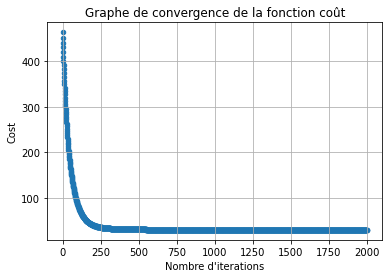

In [34]:
# Graph de convergence de la fonction cout
instance1.graph_convergence_cost_function()

Le coût diminue assez rapidement au fur et à mesure que nous continuons à avoir des poids de mieux en mieux.

##### Coefficient de détermination

In [35]:
#coefficient de détermination
ypred = instance1.getPred(x_test_scaled, Wlinear)
instance1.R2(y_test, ypred)

0.49111479100535815

Dans le cas du modèle sans régularisation nous obtenons un coefficient de détermination égale à 0,491...

##### MSE: mean square error

In [36]:
# MSE: mean square error
instance1.MSE(x_test_scaled, y_test, Wlinear)

0.5341479425742854

 Dans le cas du modèle sans régularisation nous obtenons un MSE égal à 0,534... sur nos données de test.

### Régression ridge 

#####  La pénalité optimale

In [37]:
# la pénalité optimale 
instance2 = GradientDescent(alpha = 0.01, nombre_iterations = 2000)
ridgeLambda = instance2.getRidgeLambda(x_train_scaled, y_train)
ridgeLambda

8.55

##### Les poids optimaux dans le cas de la régression ridge

In [38]:
# Les poids optimaux dans le cas de la régression ridge
Wridge = instance2.GradDescRidge(x_train_scaled, y_train, lmb = ridgeLambda)
Wridge

array([[ 2.45234508],
       [ 0.55568291],
       [ 0.2780648 ],
       [-0.09244203],
       [ 0.19330365],
       [ 0.26989016],
       [-0.10633529],
       [ 0.02320269],
       [ 0.17959913]])

##### Coefficient de détermination

In [39]:
#coefficient de détermination
ypred = instance2.getPred(x_test_scaled, Wridge)
instance2.R2(y_test, ypred)

0.5198237892906872

Le coefficient de détermination s'est améliorée par rapport au modèle sans régularisation 

##### MSE: mean square error

In [40]:
# MSE: mean square error
RidgeMSE = instance2.MSE(x_test_scaled, y_test, Wridge)
RidgeMSE

0.5040137352983992

Idem pour le MSE

##### Graph de poids des features

TypeError: only integer scalar arrays can be converted to a scalar index

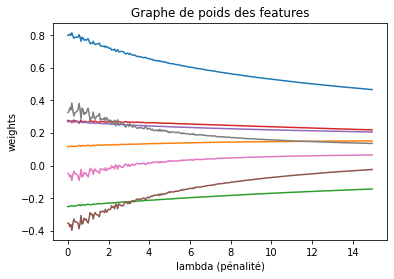

In [41]:
# Graph de poids des features
instance2.graph_de_poids_features()

Nous constatons que lorsque la pénalité augmente certains poids convergent mais lentement.

Remarque : Nous aimerions référencer la courbe correspondante à chaque feature mais on a eu un bug.


### Régression lasso

##### La pénalité optimale 

In [42]:
# la pénalité optimale 
instance3 = GradientDescent(alpha = 0.01, nombre_iterations = 5000)
LassoLambda = instance3.getLassoLambda(x_train_scaled, y_train)
LassoLambda

11.100000000000001

##### Les poids optimaux dans le cas de la régression lasso

In [43]:
# Les poids optimaux dans le cas de la régression lasso
Wlasso = instance3.GradDescLasso(x_train_scaled, y_train, lmb=LassoLambda)
Wlasso

array([[ 2.45234509e+00],
       [ 5.72514364e-01],
       [ 2.34729237e-01],
       [-8.20603787e-04],
       [ 1.19822129e-01],
       [ 1.81970686e-01],
       [ 4.37925378e-04],
       [ 1.16239041e-05],
       [ 7.45849489e-02]])

##### Coefficient de détermination

In [44]:
#coefficient de détermination
ypred = instance3.getPred(x_test_scaled, Wlasso)
instance3.R2(y_test, ypred)

0.5661174783867766

Avec la régression Lasso, nous avons obtenu un coefficient de détermination qui est meilleure comparée avec le modèle sans régularisation et avec le modèle avec régularisation ridge.  

##### MSE: mean square error

In [45]:
# MSE: mean square error
LassoMSE = instance3.MSE(x_test_scaled, y_test, Wlasso)
LassoMSE

0.45542187539014606

Idem pour le MSE 

##### Graph de poids des features

TypeError: only integer scalar arrays can be converted to a scalar index

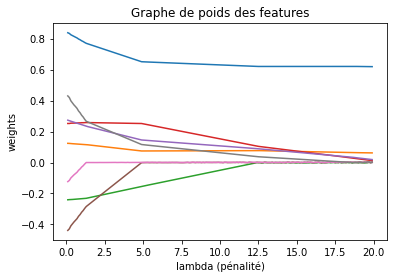

In [46]:
#Graph de poids des features
instance3.graph_de_poids_features()


- Lorsque lambda est suffisament grand les poids deviennent nuls sauf le poids d'un seul feature
- Le lasso effectue une sélection de variables 

### Régression elastic

#####  les pénalités optimaux lmb1 et lmb2 respectivement

In [100]:
# les pénalités optimaux lmb1 et lmb2 respectivement
instance4 = GradientDescent(alpha = 0.01, nombre_iterations = 3000)
ElasticLambdas = instance4.getLambdasElastic(x_train_scaled, y_train)
ElasticLambdas

(0.1, 9.0)

##### Les poids optimaux dans le cas de Elastic

In [172]:
# Les poids optimaux dans le cas de Elastic
Welastic = instance4.GradDescElastic(x_train_scaled, y_train, lmb1 = 0.1, lmb2 = 9)
Welastic

array([[ 2.45234509],
       [ 0.54878009],
       [ 0.27668205],
       [-0.08898263],
       [ 0.19177711],
       [ 0.26729261],
       [-0.09749944],
       [ 0.02392824],
       [ 0.17532904]])

##### Coefficient de détermination

In [173]:
#coefficient de détermination
ypred = instance4.getPred(x_test_scaled, Welastic)
instance4.R2(y_test, ypred)

0.5210771412495077

Le coefficient de détermination obtenue avec la régression Elastic vient en deuxième position en termes de performance après la régression Lasso.

#####  MSE: mean square error

In [174]:
# MSE: mean square error
ElasticMSE = instance4.MSE(x_test_scaled, y_test, Welastic)
ElasticMSE

0.5026981628307929

Idem pour le MSE